In [129]:
from nbparameterise import extract_parameters, parameter_values, replace_definitions
import nbformat
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, clear_output
import pickle

In [130]:
def update_input(a, b, c, d):
    
    # Open notebook
    with open("Network Utility Maximization.ipynb") as f:
        nb = nbformat.read(f, as_version=4)
        
    # Update the parameters
    orig_parameters = extract_parameters(nb)
    params = parameter_values(orig_parameters, max_iter=a, source=b, max_path=c, link=d)
    new_nb = replace_definitions(nb, params, False)
    
    # Save changes
    with open("Network Utility Maximization.ipynb", 'w') as f:
        nbformat.write(new_nb, f)

In [131]:
def run_simulator():

    # Run notebook
    %run "Network Utility Maximization.ipynb"

In [132]:
def generate_coeff(source):
    """ Generate random coefficients for the utility function """    
    
    return np.random.rand(source)

In [133]:
def generate_link(link):
    """ Generate random link capacity """

    scale = 100
    return scale * np.random.rand(link)

In [134]:
def generate_path(source, path, link):
    """ Generate random paths """
    
    x = np.zeros((source, np.max(path), link))
    for i in range(source):
        x[i,:,:] = np.round(np.random.rand(path[i], link))
        
    # check if some paths have zero links
    aux = np.where(np.sum(x, axis=2) == 0)[1]
    for idx, i in enumerate(np.where(np.sum(x, axis=2) == 0)[0]):
        z = int(np.floor(link * np.random.rand()))
        x[i,aux[idx], z] = 1
    
    return x

In [135]:
def generate_graph(source, max_path, link):
    
    # Number of paths per OD pair
    path = max_path * np.ones(source, dtype='int32')
    
    # Define utility
    coeff = generate_coeff(source)

    # Generate link capacity
    cl = generate_link(link)

    # Generate paths
    x0 = generate_path(source, path, link)
    
    data = {"coeff": coeff, "link_capacity": cl, "path": x0}
    
    # Store graph information in an external file 'graph.p'
    pickle.dump(data, open("graph.p", "wb"))

In [136]:
def f1(a1):
    global max_iter
    max_iter = a1

def f2(a2):
    global source
    source = a2

def f3(a3):
    global max_path
    max_path = a3

def f4(a4):
    global link
    link = a4
    
def f5(a5):
    global new_graph
    new_graph = a5
    
    if a5:
        w1.disabled = False
        w2.disabled = False
        w3.disabled = False
        w4.disabled = False
    else:
        w1.disabled = True
        w2.disabled = True
        w3.disabled = True
        w4.disabled = True

×-----------------------------×
INPUT PARAMETERS:
Iterations: 1000
Sources: 10
Paths: 10
Links: 10
×-----------------------------×
Simulator starts
0
100
200
300
400
500
600
700
800
900
CPU times: user 656 ms, sys: 4 ms, total: 660 ms
Wall time: 659 ms
0
100
200
300
400
500
600
700
800
900
CPU times: user 656 ms, sys: 4 ms, total: 660 ms
Wall time: 656 ms


<IPython.core.display.Javascript object>


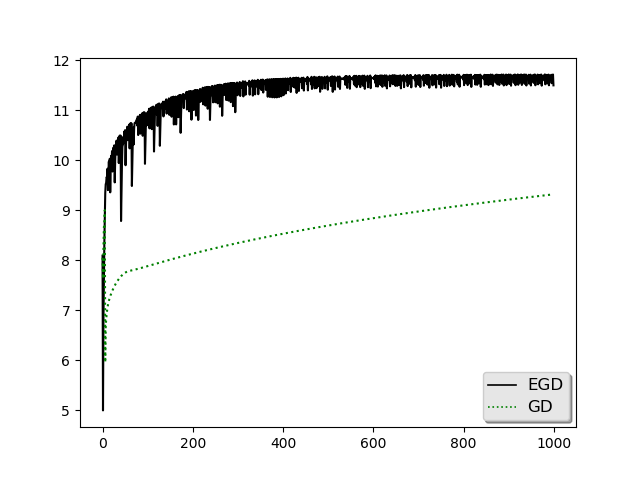

<IPython.core.display.Javascript object>


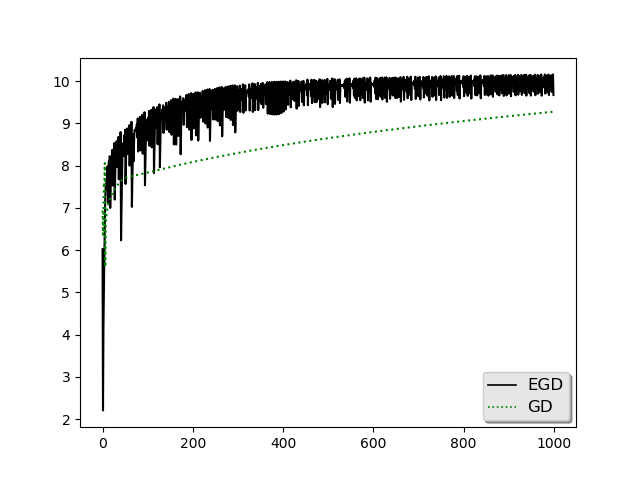

<IPython.core.display.Javascript object>


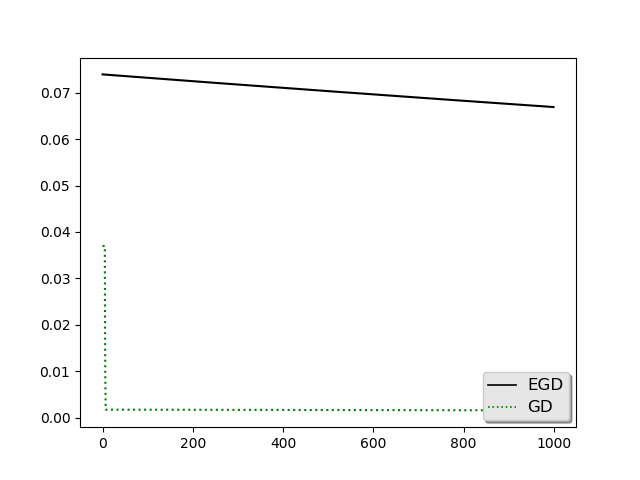

In [137]:
# Create sliders
w1 = widgets.IntSlider(description="Iterations", min=100, max=10000, step=100, value=1000)
interact(f1, a1=w1)
w2 = widgets.IntSlider(description="Sources", min=1, max=100, step=1, value=10)
interact(f2, a2=w2)
w3 = widgets.IntSlider(description="Paths", min=1, max=100, step=1, value=10)
interact(f3, a3=w3)
w4 = widgets.IntSlider(description="Links", min=1, max=100, step=1, value=10)
interact(f4, a4=w4)
w5 = widgets.Checkbox(description="New network graph", value=True)
interact(f5, a5=w5)

# Create command button
button = widgets.Button(description="Run simulator")
display(button)

def on_button_clicked(b):
    clear_output()

    if new_graph:
        print("Generating a new network graph...")
        generate_graph(source, max_path, link)
        print("Network graph generated!")
        
        # Updates input variables and launch the simulator
        print("Updating input variables...")
        update_input(max_iter, source, max_path, link)
        print("Variables updated successfully!")
        
        # Print old input parameters
    else:
        # Print input parameters
        print("×-----------------------------×")
        print("INPUT PARAMETERS:")
        print("Iterations:", max_iter)
        print("Sources:", source)
        print("Paths:", max_path)
        print("Links:", link)
        print("×-----------------------------×")
    
    print("Simulator starts")
    run_simulator()
    
button.on_click(on_button_clicked)